# TEMPERATURE FORCASTING MODEL

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
temp = pd.read_csv(r"C:\Users\hp\Downloads\archive (16)\temp.csv")

In [3]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
temp.shape

(7752, 25)

In [6]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

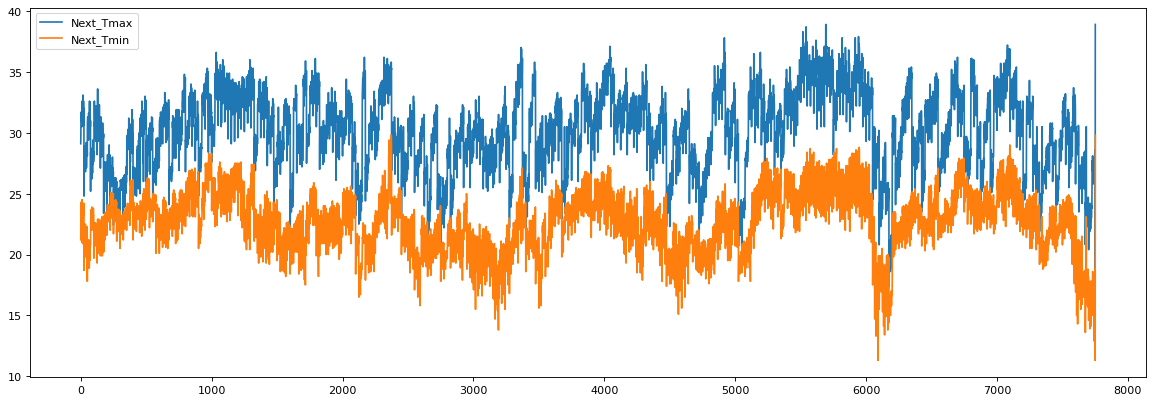

In [28]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(temp["Next_Tmax"],label="Next_Tmax")
plt.plot(temp["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

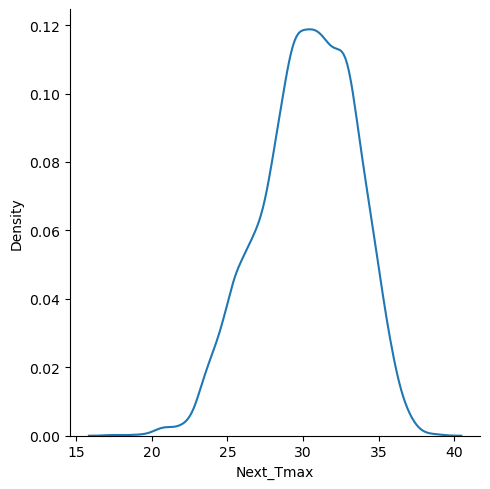

<Figure size 640x480 with 0 Axes>

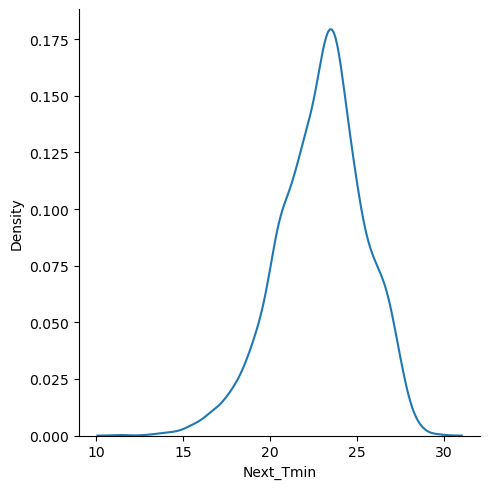

30.275670794633644
3.12258538399001
22.932804437564496
2.4832959646581934


In [29]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(temp[col],kind='kde')
    plt.show()
print(temp["Next_Tmax"].mean())
print(temp["Next_Tmax"].std())
print(temp["Next_Tmin"].mean())
print(temp["Next_Tmin"].std())

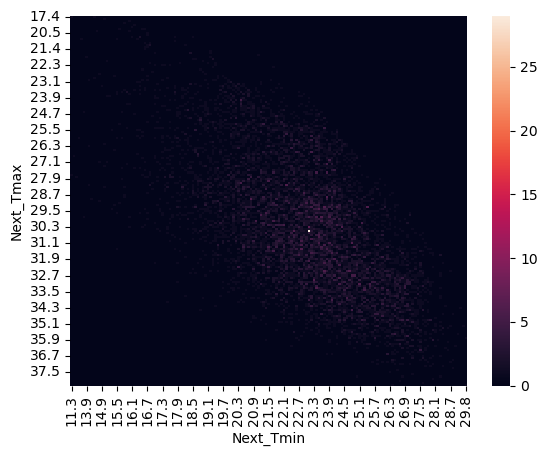

In [30]:
plt.figure()
sns.heatmap(pd.crosstab(temp['Next_Tmax'],temp['Next_Tmin']))
plt.show()

<Axes: >

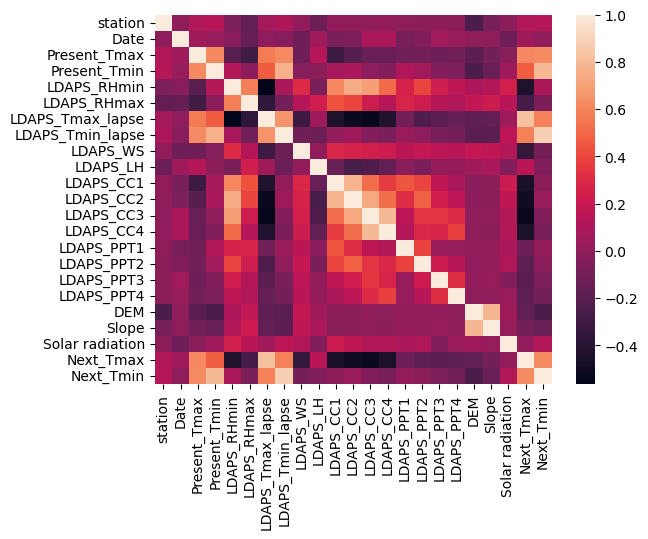

In [31]:
sns.heatmap(temp.corr())

In [7]:
temp['station'].iloc[7750] = 1.0
temp['station'].iloc[7751] = 2.0

C:\Users\hp\AppData\Local\Temp\ipykernel_21404\396963084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['station'].iloc[7750] = 1.0
C:\Users\hp\AppData\Local\Temp\ipykernel_21404\396963084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['station'].iloc[7751] = 2.0


In [8]:
temp['Date'].iloc[7750] = '31-08-2017'
temp['Date'].iloc[7751] = '31-08-2017'

C:\Users\hp\AppData\Local\Temp\ipykernel_21404\3408568920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Date'].iloc[7750] = '31-08-2017'
C:\Users\hp\AppData\Local\Temp\ipykernel_21404\3408568920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Date'].iloc[7751] = '31-08-2017'


In [9]:
temp.drop(columns = ['lat' , 'lon'], inplace = True)

In [10]:
for col in temp.columns:
    if col not in ['station' , 'Date']:
        temp[col] = temp[col].replace(np.nan, temp[col].median())

In [11]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
temp['Date'] = pd.to_datetime(temp['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_21404\4129752031.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp['Date'] = pd.to_datetime(temp['Date'])


C:\Users\hp\AppData\Local\Temp\ipykernel_21404\1999214139.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_corr = temp.corr()


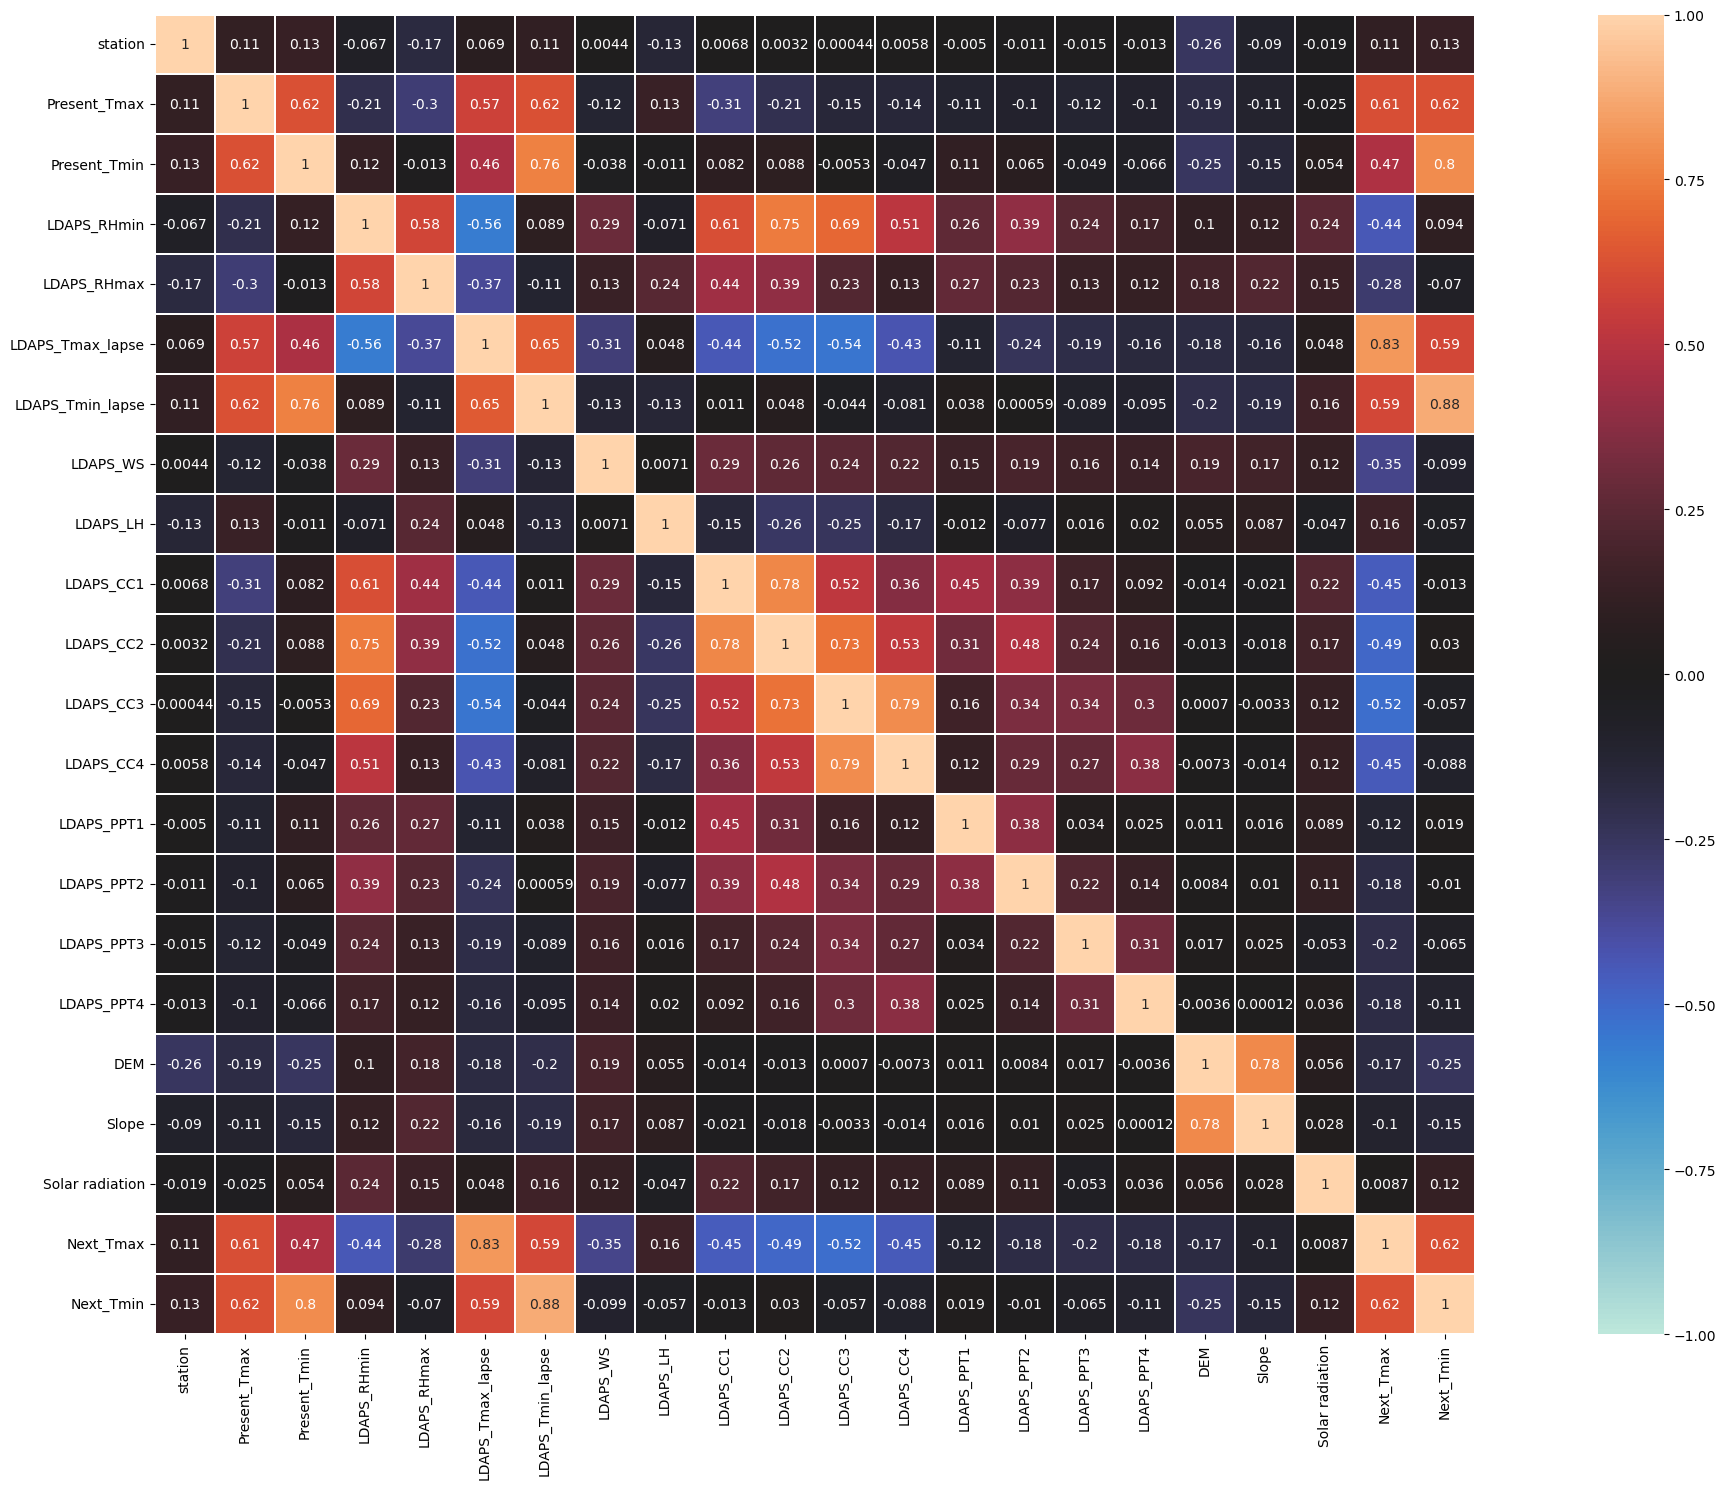

In [13]:
temp_corr = temp.corr()
plt.figure(figsize = (25,15))
sns.heatmap(temp_corr, vmin = -1, vmax=1, annot=True , square = True, center=0,fmt='.2g', linewidth= 0.1)
plt.tight_layout()

In [14]:
temp.skew()

C:\Users\hp\AppData\Local\Temp\ipykernel_21404\965588433.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp.skew()


station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [15]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(temp[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)


In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

temp['Date'] = enc.fit_transform(temp['Date'].values.reshape(-1,1))

In [17]:
x = temp.drop(['Next_Tmax' , 'Next_Tmin'] , axis=1)
y = temp[['Next_Tmax' , 'Next_Tmin']]

In [18]:
for index in x.skew().index:
    if x.skew().loc[index] > 0.5:
        x[index] = np.cbrt(x[index])
        if x.skew().loc[index] <-0.5 :
            x[index] = np.square(x[index]) 

In [19]:
x.skew()

station             0.000182
Date                0.001488
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            0.892479
LDAPS_LH           -0.409684
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.196712
LDAPS_CC4          -0.460573
LDAPS_PPT1          1.976295
LDAPS_PPT2          2.284577
LDAPS_PPT3          2.593630
LDAPS_PPT4          2.872150
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
dtype: float64

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [21]:
from sklearn.linear_model import LinearRegression
max_r_score = 0
r_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
    print("max r2 score is" , max_r_score , "on random State" , r_state)

max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random State 1
max r2 score is 0.8059707506639647 on random S

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

ext = ExtraTreesRegressor()
ext.fit(x_train, y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2score = r2_score(y_test, pred_ext)*100

In [24]:
grid_params = {
    'max_depth' : [8,9,10,12,15,20],
    'n_estimators' : [500,700,1000,1200],
    'min_samples_split' : [2,3]
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

grid_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    
}

model = ExtraTreesRegressor()
GCV = GridSearchCV(model, grid_params, cv=5)


GCV.fit(x_train, y_train)

best_params = GCV.best_params_
best_model = GCV.best_estimator_

y_pred = best_model.predict(x_train)
pred = best_model.predict(x_test)


In [47]:
y_pred

array([[30.00630667, 21.70163333],
       [31.2112606 , 24.96174195],
       [33.69406428, 23.5339266 ],
       ...,
       [33.5023193 , 26.68716855],
       [26.99964   , 24.70076   ],
       [32.02672491, 25.18538461]])